C:\Users\qianp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


linear prediction: [24.82340108 23.77736709 29.40699074 12.141119   21.41824566 19.28207548
 20.430164   21.36941103 18.81491049 20.01402542  5.18110403 16.42209865
 17.08006368  5.60498478 40.02186658 32.45488288 22.43336667 36.88080233
 30.79672727 23.10972655 24.75967837 24.70459911 20.64499786 30.29401604
 22.36139181 10.34991743 17.72104919 18.25322153 35.59010858 21.02722666
 18.32904016 17.78019591 20.09226863 24.12589031 29.17793818 19.27386013
 11.1438506  24.60592041 17.60164436 15.50939867 26.0693398  20.78590233
 22.29931656 15.65433953 23.06746556 25.23864006 20.0890847  22.86526658
  9.96924554 24.32763836 20.87964473 17.21107065 24.54714977 29.84156306
 13.44275194 21.65722663 20.75085142 15.54289136 14.09677235 22.24345471
 17.76198642 21.55530802 32.82022968 31.00563653 17.66721894 32.7467913
 18.7176827  19.86847443 19.05475541 22.76462044 22.99230446 23.98024774
 30.71207584 28.81090423 25.9059546   5.18876969 36.73003808 23.72669981
 27.30005496 19.29505398 28.62315

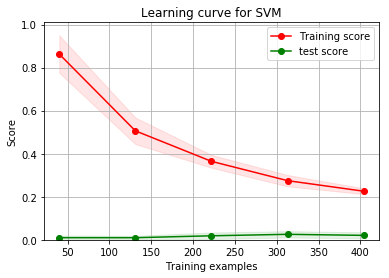

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
%matplotlib inline
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)

foo = lambda x: pd.Series([i for i in reversed(x.split())])
rev = df[0].apply(foo)
rev.columns = ["MEDV","LSTAT","B","PTRATIO","TAX","RAD","DIS","AGE","RM","NOX","CHAS","INDUS","ZN","CRIM"]
X=rev.iloc[:,1:].drop(columns=["INDUS","AGE"])
y=rev["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_std, y_train)#the core training alogrithm

y_pred = linreg.predict(X_test_std)
print("linear prediction:",y_pred)
print ("errorvarient:"," ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

for i in range(10):
    ax = plt.subplot(6, 2, i + 1)
    plt.scatter(X.iloc[:,i], y)
plt.show()


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="test score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred2 = classifier.fit(X_train_std, y_train).predict(X_test_std)
print("SVM prediction:",y_pred2)
plot_learning_curve(classifier, "Learning curve for SVM", X, y, (0.0, 1.01), cv=cv, n_jobs=4)
print ("errorvarient2:"," ",np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
plt.show()

errorvarient:   5.781366335656937


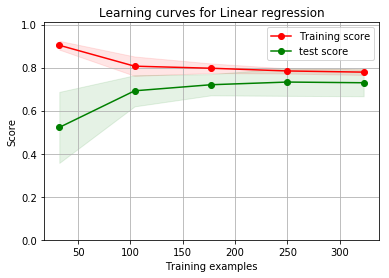

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)

foo = lambda x: pd.Series([i for i in reversed(x.split())])
rev = df[0].apply(foo)
rev.columns = ["MEDV","LSTAT","B","PTRATIO","TAX","RAD","DIS","AGE","RM","NOX","CHAS","INDUS","ZN","CRIM"]
X=rev.iloc[:,1:].drop(columns=["INDUS","AGE"])#drop column "indus" and"age" 
y=rev["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_std, y_train)#the core training alogrithm

y_pred = linreg.predict(X_test_std)
print ("errorvarient:"," ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE：{}'.format(round(metrics.mean_squared_error(y_pred,y_test),2)))
print('EVC：{}'.format(round(metrics.explained_variance_score(y_pred,y_test),2)))

def showdisrt():
    for i in range(0, t.columns.size):
        namelist = t.columns.values.tolist()
        ax = plt.subplot(4, 4, i + 1)
        d1 = pd.Series(t.iloc[:, i])
        min = d1.min()
        max = d1.max()
        step = (max - min) / 5
        x_axis = np.arange(min, max, step)
        plt.xticks()
        plt.title(namelist[i])
        plt.scatter(t.iloc[:, i], y, s=5)
    plt.show()

showdisrt()


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_min=np.amin(test_scores,axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="test score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linreg, "Learning curves for Linear regression", X_train_std,y_train, (0.0, 1.01),ShuffleSplit(n_splits=10, test_size=0.2, random_state=0), n_jobs=4)

plt.show()

22.532806324110698
Cheap: 297
Expensive 209
<bound method DataFrame.info of      LSTAT       B  PTRATIO    TAX   RAD     DIS    AGE     RM    NOX  CHAS  \
0     4.98  396.90     15.3  296.0   1.0  4.0900   65.2  6.575  0.538   0.0   
1     9.14  396.90     17.8  242.0   2.0  4.9671   78.9  6.421  0.469   0.0   
2     4.03  392.83     17.8  242.0   2.0  4.9671   61.1  7.185  0.469   0.0   
3     2.94  394.63     18.7  222.0   3.0  6.0622   45.8  6.998  0.458   0.0   
4     5.33  396.90     18.7  222.0   3.0  6.0622   54.2  7.147  0.458   0.0   
5     5.21  394.12     18.7  222.0   3.0  6.0622   58.7  6.430  0.458   0.0   
6    12.43  395.60     15.2  311.0   5.0  5.5605   66.6  6.012  0.524   0.0   
7    19.15  396.90     15.2  311.0   5.0  5.9505   96.1  6.172  0.524   0.0   
8    29.93  386.63     15.2  311.0   5.0  6.0821  100.0  5.631  0.524   0.0   
9    17.10  386.71     15.2  311.0   5.0  6.5921   85.9  6.004  0.524   0.0   
10   20.45  392.52     15.2  311.0   5.0  6.3467   94.3

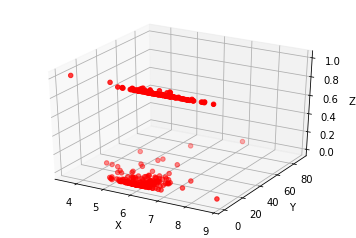

Misclassified samples: 17
Accuracy: 0.83


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

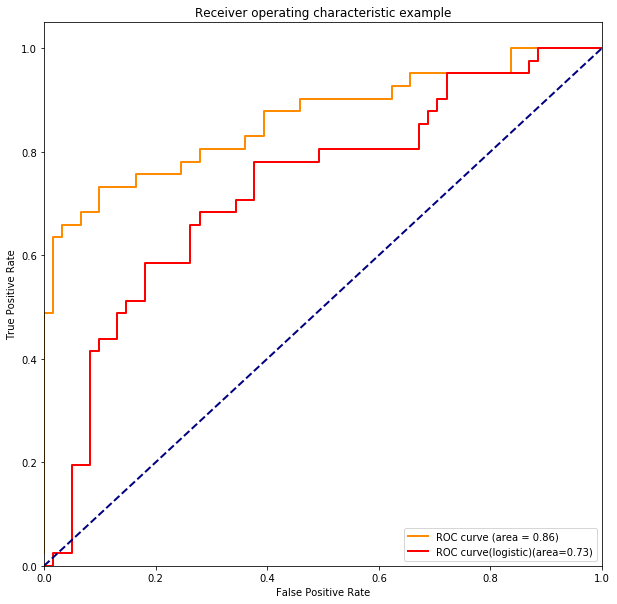

Normalized confusion matrix
[[0.9  0.1 ]
 [0.27 0.73]]


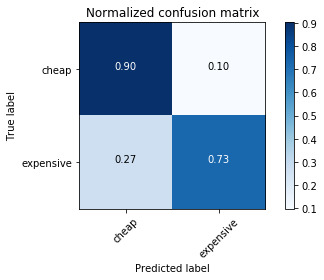

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve,auc
from sklearn import svm
from sklearn.metrics import accuracy_score
import itertools
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)#read csv file

foo = lambda x: pd.Series([i for i in reversed(x.split())])#for some reason, there is only one colulmn in the csv file,so have to split them
rev = df[0].apply(foo)
rev.columns = ["MEDV","LSTAT","B","PTRATIO","TAX","RAD","DIS","AGE","RM","NOX","CHAS","INDUS","ZN","CRIM"]#rename each column
rev=pd.DataFrame(rev,dtype=np.float)#reset dataframe to be float
X=rev.iloc[:,1:]
y=rev["MEDV"]
sum=0
#caculate mean of y
for i in y:
    sum=sum+float(i)
meanval=sum/len(y.tolist())
print(meanval)
#replace each data in value with new data
y[y>=meanval]=1
y[y!=1]=0

#split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Standardlize data
sc = StandardScaler()
sc.fit(X_train)
countcheap=0
countexpen=0
for i in y:
    if i==1:
        countexpen=countexpen+1
    elif i==0:
        countcheap=countcheap+1

print("Cheap:",countcheap)
print("Expensive",countexpen)
print(X.info)
print(rev.info)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#draw a 3d graph of column["RM"] and column["CRIM"]
ax = plt.subplot(projection='3d')
ax.scatter(X_train["RM"], X_train["CRIM"], y_train, c='r')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')

plt.draw()
plt.pause(10)
plt.savefig('3D.jpg')
plt.close()

#training data with LinearSVC model
svmp=svm.LinearSVC()
svmp.fit(X_train_std,y_train)
y_pred=svmp.predict(X_test_std)#get predict value

#training data with LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_std,y_train)
y_pred_logistic=classifier.predict(X_test_std)

y_scoret=classifier.fit(X_train_std,y_train).decision_function(X_test)#get scores of test set
y_score = svmp.fit(X_train, y_train).decision_function(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())#caculate accuracy and misclassified samples
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

#plot learning curve
#estimator is the classifier that used in training,
#ylim is the range,here set the range [0,1.01]
#cv is cross validation. Although at the begining we used train_test_split,but for some reason willn occur some error, so here we use another function called"Shufflesplit"
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    #plot the point on the curve
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_score_mean - train_score_std,train_score_mean + train_score_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_score_mean - test_score_std,test_score_mean + test_score_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_score_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g",label="test score")

    plt.legend(loc="best")
    return plt

#plot_learning_curve(svmp, "Learning curves for SVM", X_train_std,y_train, (0.0, 1.01),ShuffleSplit(n_splits=10, test_size=0.2, random_state=0), n_jobs=4)
#plt.show()

#plot roc curve of
fpr, tpr,_=roc_curve(y_test,y_score,drop_intermediate=False)
fpt, tpt,_=roc_curve(y_test,y_scoret,drop_intermediate=False)
plt.figure()
roc_auc = auc(fpr, tpr)  #caculate auc
roc_auct=auc(fpt,tpt)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpt, tpt, color="r",lw=lw, label="ROC curve(logistic)(area=%0.2f)" %roc_auct)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

#plot the confusion matrix based on the confusion matrix that was caculated in other steps
class_names=["cheap","expensive"]
#
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()


errorvarient:   4.921963035609722
MSE：24.23
EVC：0.74


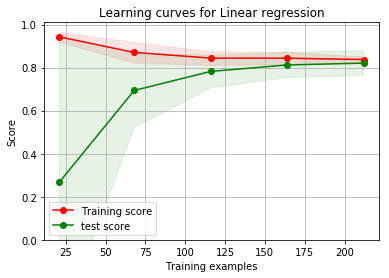

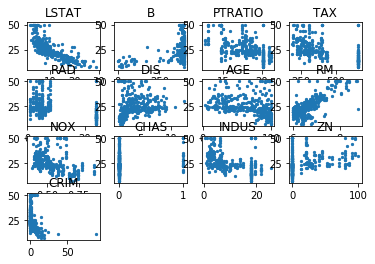

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
#%matplotlib inline

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)

foo = lambda x: pd.Series([i for i in reversed(x.split())])
rev = df[0].apply(foo)
rev.columns = ["MEDV","LSTAT","B","PTRATIO","TAX","RAD","DIS","AGE","RM","NOX","CHAS","INDUS","ZN","CRIM"]
rev=pd.DataFrame(rev,dtype=np.float)
t=rev.iloc[:,1:]
t=t[t["RM"]>=6]
rev=rev[rev["RM"]>=6]
X=rev.iloc[:,1:].drop(columns=["INDUS","AGE"])
y=rev["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_std, y_train)#the core training alogrithm

y_pred = linreg.predict(X_test_std)
print ("errorvarient:"," ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE：{}'.format(round(metrics.mean_squared_error(y_pred,y_test),2)))
print('EVC：{}'.format(round(metrics.explained_variance_score(y_pred,y_test),2)))


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_min=np.amin(test_scores,axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="test score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linreg, "Learning curves for Linear regression", X_train_std,y_train, (0.0, 1.01),ShuffleSplit(n_splits=10, test_size=0.2, random_state=0), n_jobs=4)
plt.show()

def showdisrt():
    for i in range(0, t.columns.size):
        namelist = t.columns.values.tolist()
        ax = plt.subplot(4, 4, i + 1)
        d1 = pd.Series(t.iloc[:, i])
        min = d1.min()
        max = d1.max()
        step = (max - min) / 5
        x_axis = np.arange(min, max, step)
        plt.xticks()
        plt.title(namelist[i])
        plt.scatter(t.iloc[:, i], y, s=5)
    plt.show()

showdisrt()


